### Data exploration and viz of Find it Fix It requests to the City of Seattle (from a FOI request)

In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import math
import re
import os
import datetime as dt
import string
import scipy as sp

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':30,
                              'axes.titlesize':30,
                              'axes.labelsize':25})
#sns.set_context("poster")
#sns.set_style("dark")
#sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
#path for FIFI cleaned and preprocessed data frame
path_FIFI = 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/generated_datasets/data_final.pkl'
path_PIT = 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/PIT_count.xlsx'
path_demogs = 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/neighborhood_demogs_2018.xlsx'

In [3]:
#read in pkl file containing 
data = pd.read_pickle(path_FIFI)
data = pd.DataFrame(data = data)
data.reset_index(inplace=True, drop=True)

print('Original data shape:\n', data.shape, '\n')
print('Original data columns:\n', data.columns.values, '\n')

data.tail()

Original data shape:
 (248815, 67) 

Original data columns:
 ['Service_Request_Number' 'Created_Date' 'Location' 'Location_Details'
 'Description' 'License_Number' 'State' 'Vehicle_Make' 'Vehicle_Color'
 'Time_parked' 'Photo' 'FIFI_category' 'Location_Details.1'
 'Property_damage?' 'Current_Issue' 'Type_of_animal'
 'On_private_property?' 'Graffiti_location' 'Location_and_Description'
 'Obscene/Racial/Hateful?' 'Street/Intersection' 'Where?' 'Type_of_item?'
 'Veg_location' 'Vegetation_Safety_Issue' 'Parking_Violation_Concerning'
 'License_Plate_Number' 'Location_details' '7_digit_number_on_pole'
 'Issue' 'date' 'year' 'month' 'day' 'day_of_week' 'hour' 'zip'
 'neighborhood' 'SittingInformal' 'Lying' 'DisruptiveActivity_Aggressive'
 'DisruptiveActivity_Intoxicated' 'LivingActivities' 'Soliciting'
 'overdose' 'pop' 'pop_dens' 'housing_units' 'med_home' 'land_area'
 'occupied_units' 'occupied_ratio' 'med_income' 'med_age' 'male_%'
 'white_%' 'fam_%' 'nokid_%' 'mortgage_%' 'fulltime_%' 'une

,Service_Request_Number,Created_Date,Location,Location_Details,Description,License_Number,State,Vehicle_Make,Vehicle_Color,Time_parked,Photo,FIFI_category,Location_Details.1,Property_damage?,Current_Issue,Type_of_animal,On_private_property?,Graffiti_location,Location_and_Description,Obscene/Racial/Hateful?,Street/Intersection,Where?,Type_of_item?,Veg_location,Vegetation_Safety_Issue,Parking_Violation_Concerning,License_Plate_Number,Location_details,7_digit_number_on_pole,Issue,date,year,month,day,day_of_week,hour,zip,neighborhood,SittingInformal,Lying,DisruptiveActivity_Aggressive,DisruptiveActivity_Intoxicated,LivingActivities,Soliciting,overdose,pop,pop_dens,housing_units,med_home,land_area,occupied_units,occupied_ratio,med_income,med_age,male_%,white_%,fam_%,nokid_%,mortgage_%,fulltime_%,unemploy,drive_%,publictrans_%,other_%,wrk_travel,city council,county council
248810,15-00168749,2015-11-19 17:35:38.999,"900 4TH AVE, SEATTLE, WA 98164","900 4TH AVE; XY: 1270798.8226449674, 224488.72...",Broken curb near bus stop.,NaN,NaN,NaN,NaN,NaN,http://servicerequest.seattle.gov/media/seattl...,Pothole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On the south side of Marion St between 4th and...,NaN,NaN,2015-11-19,2015,11,19,Thursday,17,98164,DT?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,39846.0,126.0,NaN,0.00,97.0,0.769841,73833.0,41.0,54.0,82.3,30.0,99.0,48.0,51.0,0.0,66.0,0.0,34.0,35.0,7.0,4.0
248811,16-00141343,2016-08-24 23:09:57.000,"909 5TH AVE, SEATTLE, WA 98164","909 5TH AVE; XY: 1270817.6579094788, 224809.77...",Uneven roadway & pothole by sewer manhole,NaN,NaN,NaN,NaN,NaN,http://servicerequest.seattle.gov/media/seattl...,Pothole,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,909 5th Avenue,NaN,NaN,2016-08-24,2016,8,24,Wednesday,23,98164,DT?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,39846.0,126.0,NaN,0.00,97.0,0.769841,73833.0,41.0,54.0,82.3,30.0,99.0,48.0,51.0,0.0,66.0,0.0,34.0,35.0,7.0,4.0
248812,16-00185056,2016-11-10 19:43:08.000,"900 4TH AVE, SEATTLE, WA 98164","900 4TH AVE; XY: 1270672.8549074451, 224511.48...",Inlet plugged entirely w debris. It's been lik...,NaN,NaN,NaN,NaN,NaN,http://servicerequest.seattle.gov/media/seattl...,Other,SE corner of Marion st at 4th Ave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-10,2016,11,10,Thursday,19,98164,DT?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,39846.0,126.0,NaN,0.00,97.0,0.769841,73833.0,41.0,54.0,82.3,30.0,99.0,48.0,51.0,0.0,66.0,0.0,34.0,35.0,7.0,4.0
248813,19-00014479,2019-01-21 17:50:04.999,"5765 NE BOTHELL WAY, KENMORE, WA 98028","5765 NE BOTHELL WAY; XY: 1287218.0249462035, 2...",Street light over parking lot is out. Not sur...,NaN,NaN,NaN,NaN,NaN,NaN,Streetlight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164732.0,Out,2019-01-21,2019,1,21,Monday,17,98028,Kenmore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20419.0,3606.0,8566.0,386200.0,5.66,7981.0,0.931707,82448.0,40.0,50.0,79.9,55.0,67.0,53.0,43.0,4.0,80.0,8.2,11.8,35.0,NaN,1.0
248814,19-00014480,2019-01-21 17:56:02.000,"5793 NE BOTHELL WAY, KENMORE, WA 98028","5793 NE BOTHELL WAY; XY: 1287402.046344753, 27...",This one is the opposite of my last one report...,NaN,NaN,NaN,NaN,NaN,NaN,Streetlight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Out,2019-01-21,2019,1,21,Monday,17,98028,Kenmore,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20419.0,3606.0,8566.0,386200.0,5.66,7981.0,0.931707,82448.0,40.0,50.0,79.9,55.0,67.0,53.0,43.0,4.0,80.0,8.2,11.8,35.0,NaN,1.0


In [4]:
#only use data that has complete year
data_complete = data[data['year'].isin([2014, 2015, 2016, 2017, 2018])]
data_other = data_complete[data_complete['FIFI_category'] == 'Other']

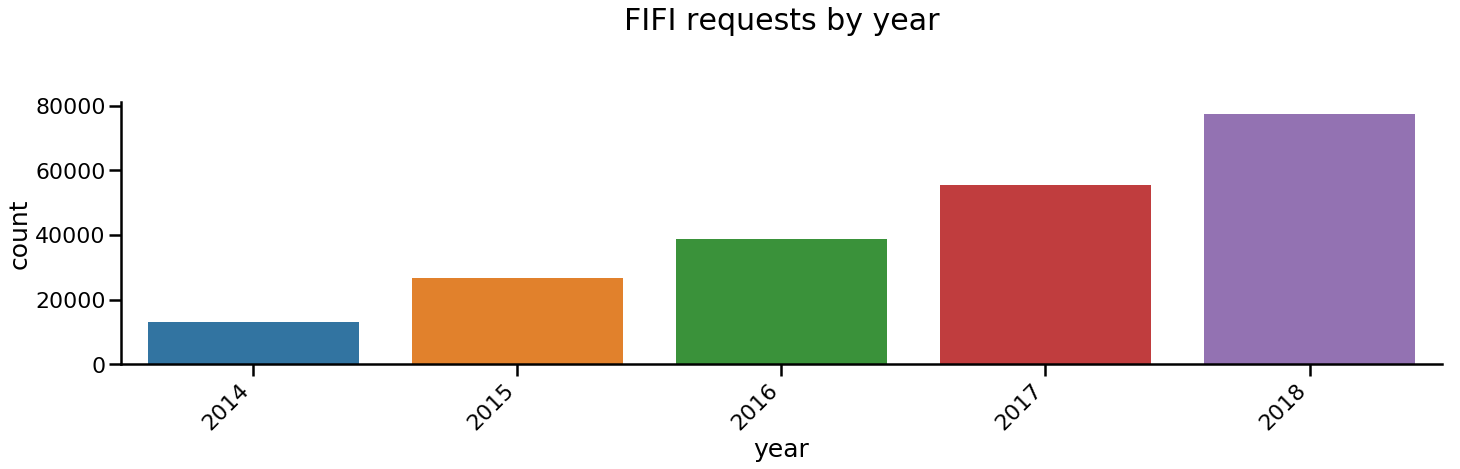

In [5]:
#how do counts change across years?
g = sns.catplot(x='year', data=data_complete, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

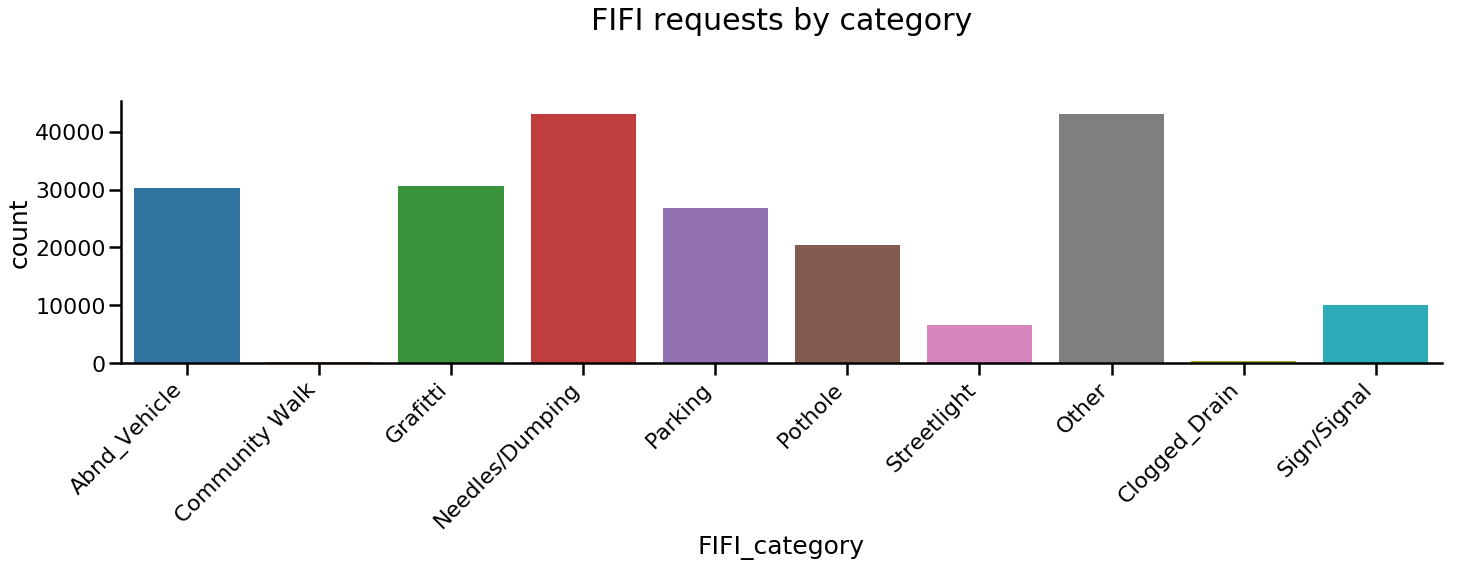

In [6]:
#how do counts change across FIFI_category?
g = sns.catplot(x='FIFI_category', data=data_complete, kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by category', y=1.25)
plt.subplots_adjust(hspace = 1.5)

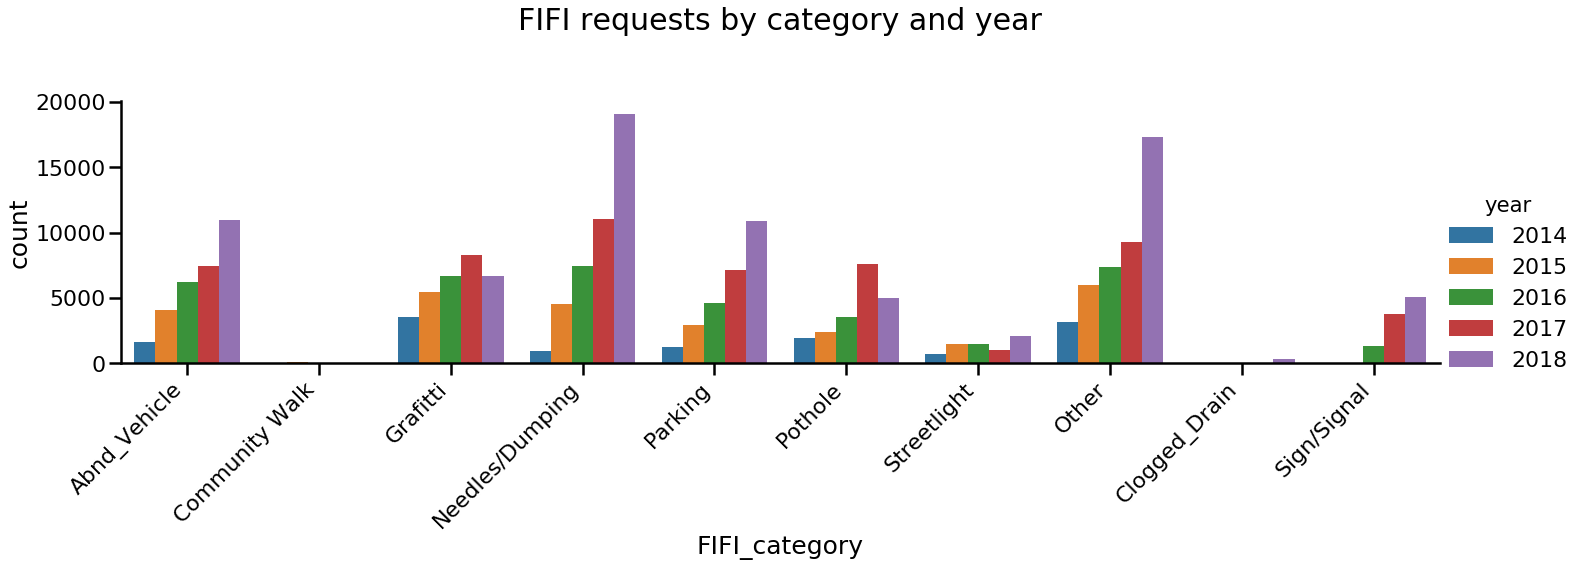

In [7]:
#how do counts change across year and FIFI_category?
g = sns.catplot(x='FIFI_category', data=data_complete, hue='year', kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by category and year', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [8]:
#read in excel file containing population and point in time count data acorss years

data_PIT = pd.read_excel(path_PIT)
data_PIT = pd.DataFrame(data = data_PIT)
print(data_PIT.shape)

#add in number of FIFI requests by year
data_PIT['FIFI_counts'] = data_complete.groupby('year')['FIFI_category'].count().values
data_PIT

(5, 8)


,year,seattle pop,king pop,camping reports,sheltered,unsheltered,ratio,total,FIFI_counts
0,2014,669641,2018000,139,6171,3123,0.506077,9294,13070
1,2015,685447,2118000,547,6275,3772,0.601116,10047,26882
2,2016,707255,2156000,1054,6225,4505,0.723695,10730,38679
3,2017,724745,2189000,2789,6158,5485,0.890711,11643,55386
4,2018,744945,2190200,7369,5792,6320,1.091160,12112,77409


In [9]:
data_PIT.corr()

,year,seattle pop,king pop,camping reports,sheltered,unsheltered,ratio,total,FIFI_counts
year,1.000000,0.999057,0.920181,0.890249,-0.722694,0.997196,0.989222,0.996604,0.992301
seattle pop,0.999057,1.000000,0.908197,0.895784,-0.737728,0.997133,0.990879,0.994025,0.992290
king pop,0.920181,0.908197,1.000000,0.664738,-0.410462,0.893119,0.855581,0.932100,0.874114
camping reports,0.890249,0.895784,0.664738,1.000000,-0.950249,0.911124,0.944207,0.862210,0.939095
sheltered,-0.722694,-0.737728,-0.410462,-0.950249,1.000000,-0.756907,-0.812110,-0.681135,-0.796672
unsheltered,0.997196,0.997133,0.893119,0.911124,-0.756907,1.000000,0.995928,0.994038,0.995941
ratio,0.989222,0.990879,0.855581,0.944207,-0.812110,0.995928,1.000000,0.980265,0.998542
total,0.996604,0.994025,0.932100,0.862210,-0.681135,0.994038,0.980265,1.000000,0.982855
FIFI_counts,0.992301,0.992290,0.874114,0.939095,-0.796672,0.995941,0.998542,0.982855,1.000000


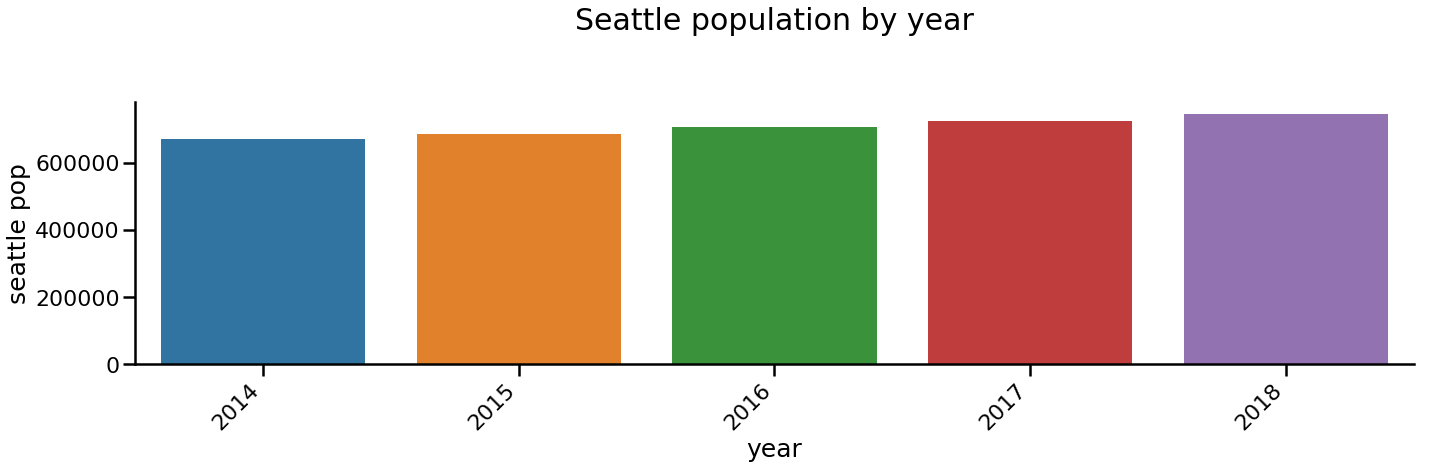

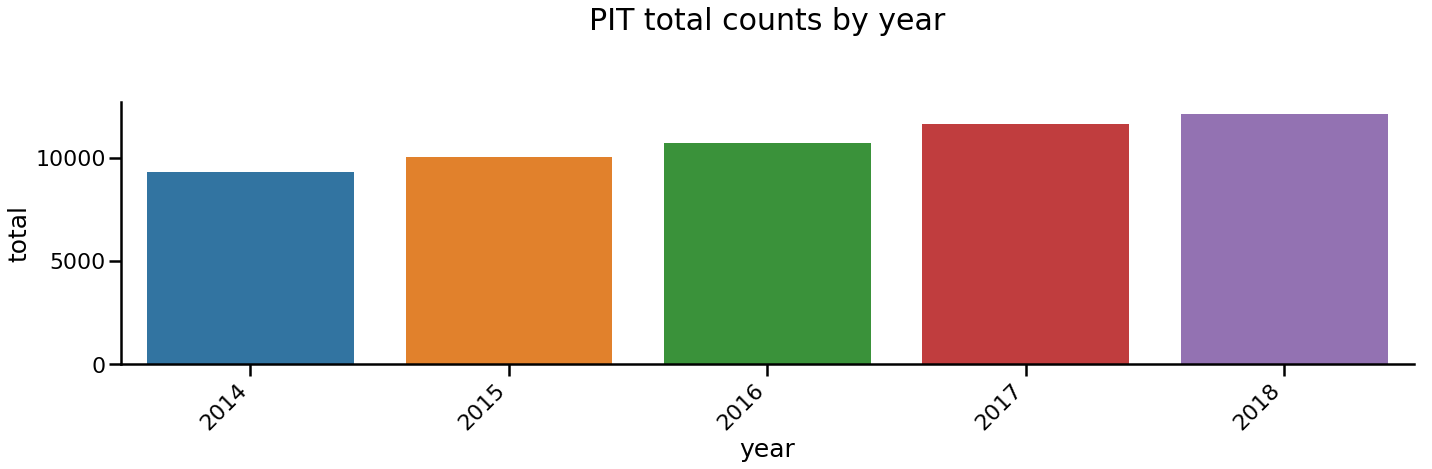

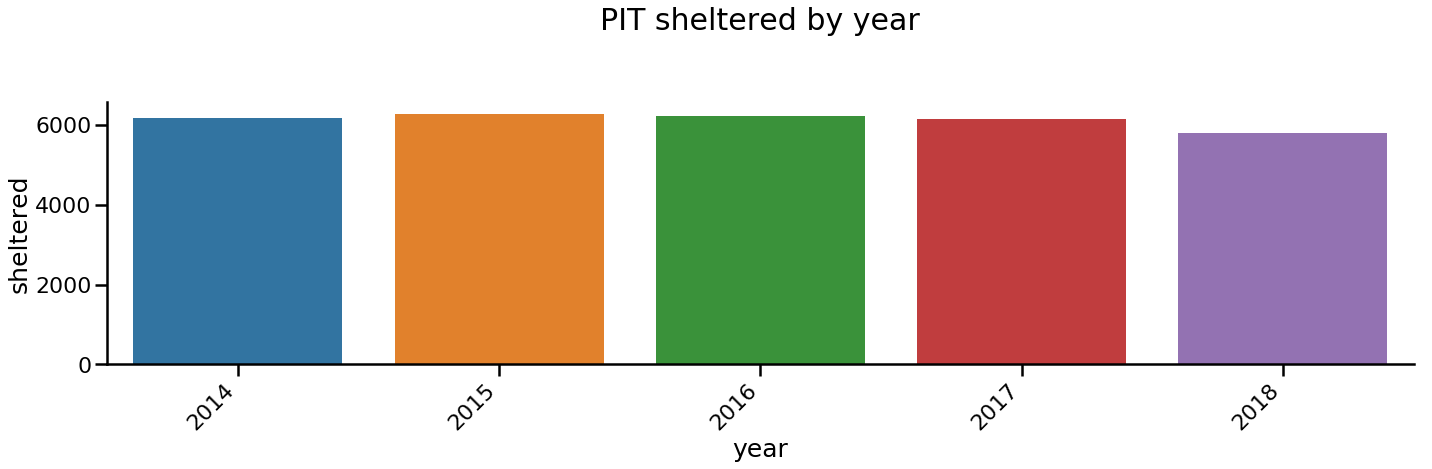

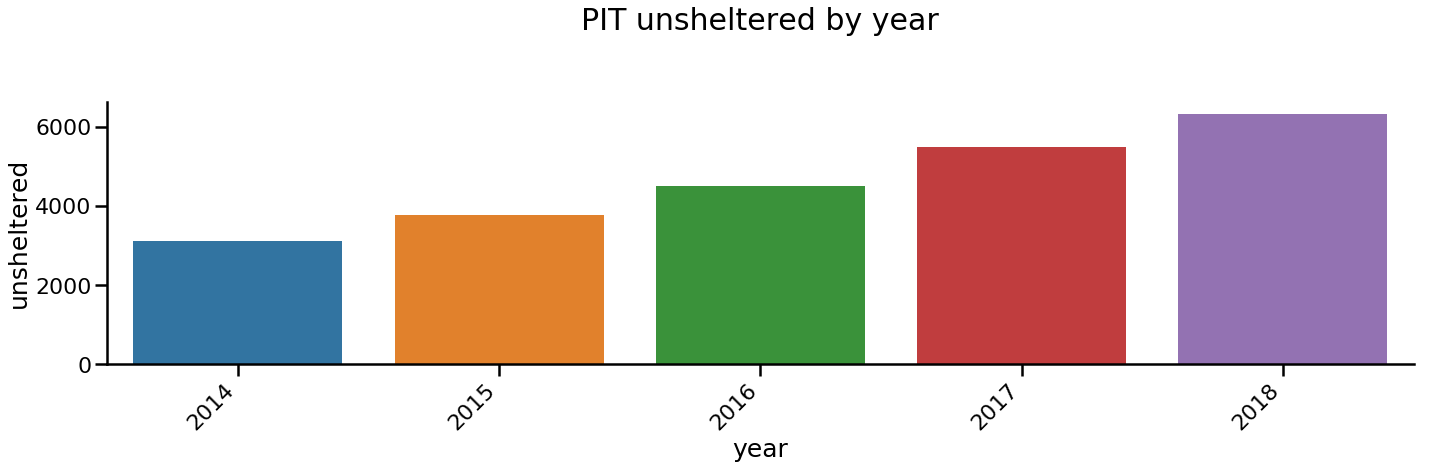

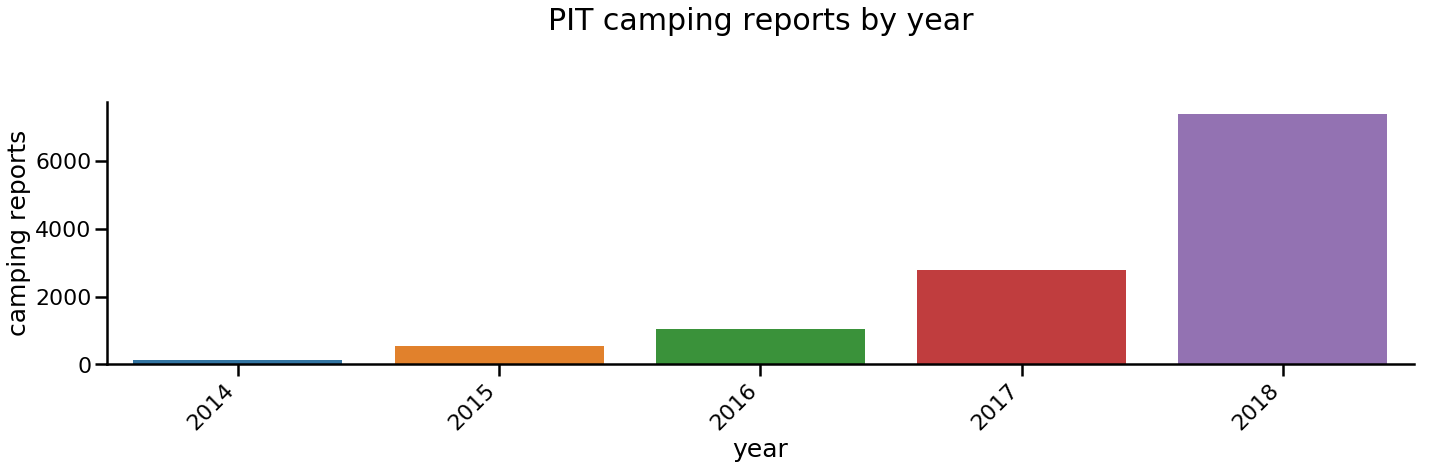

In [10]:
#can we explain the increase in requests over time by population and/or point in time count data?
g = sns.catplot(x='year', y='seattle pop', data=data_PIT, kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('Seattle population by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='year', y='total', data=data_PIT, kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('PIT total counts by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='year', y='sheltered', data=data_PIT, kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('PIT sheltered by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='year', y='unsheltered', data=data_PIT, kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('PIT unsheltered by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='year', y='camping reports', data=data_PIT, kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('PIT camping reports by year', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

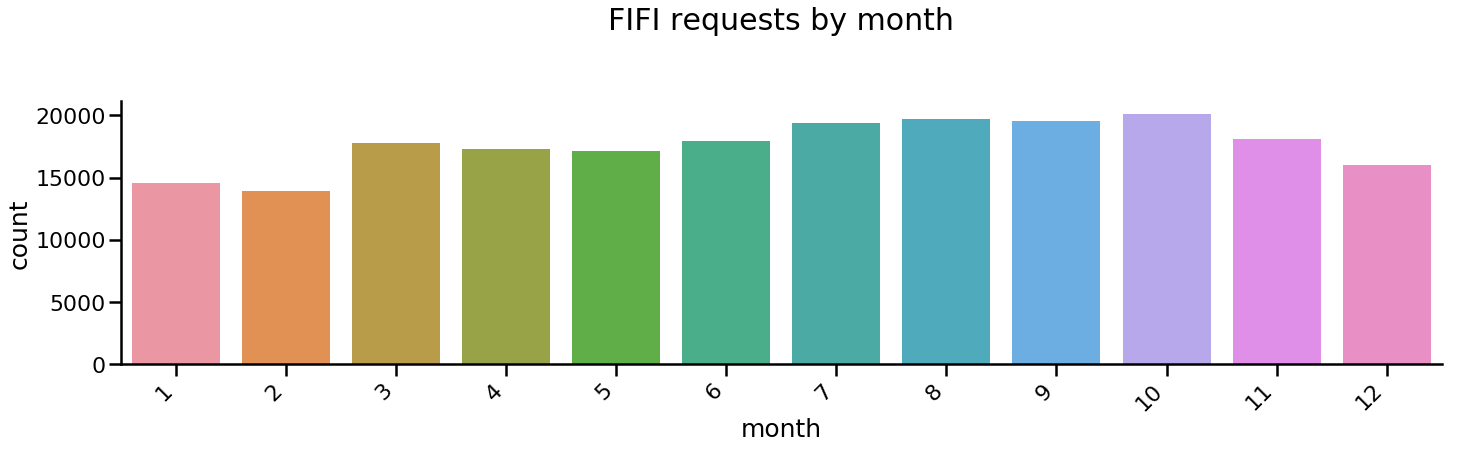

In [11]:
#viz FIFI requests across time
g = sns.catplot(x='month', data=data_complete, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by month', y=1.25)
plt.subplots_adjust(hspace = 1.5)

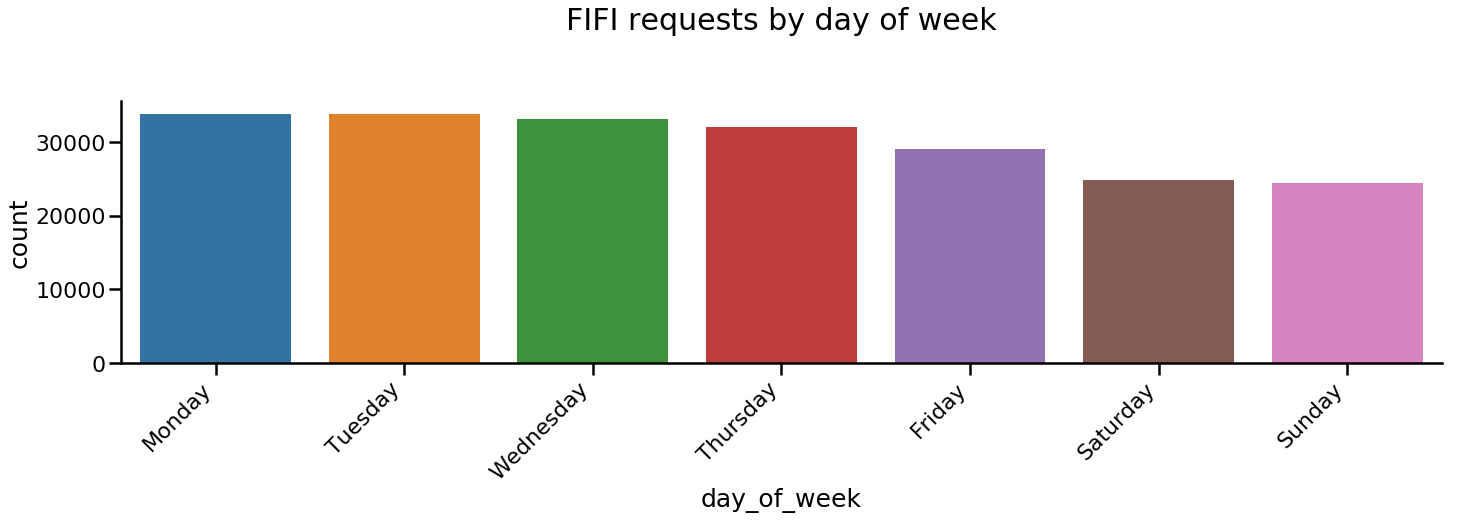

In [12]:
#viz FIFI requests across time
g = sns.catplot(x='day_of_week', data=data_complete, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by day of week', y=1.25)
plt.subplots_adjust(hspace = 1.5)

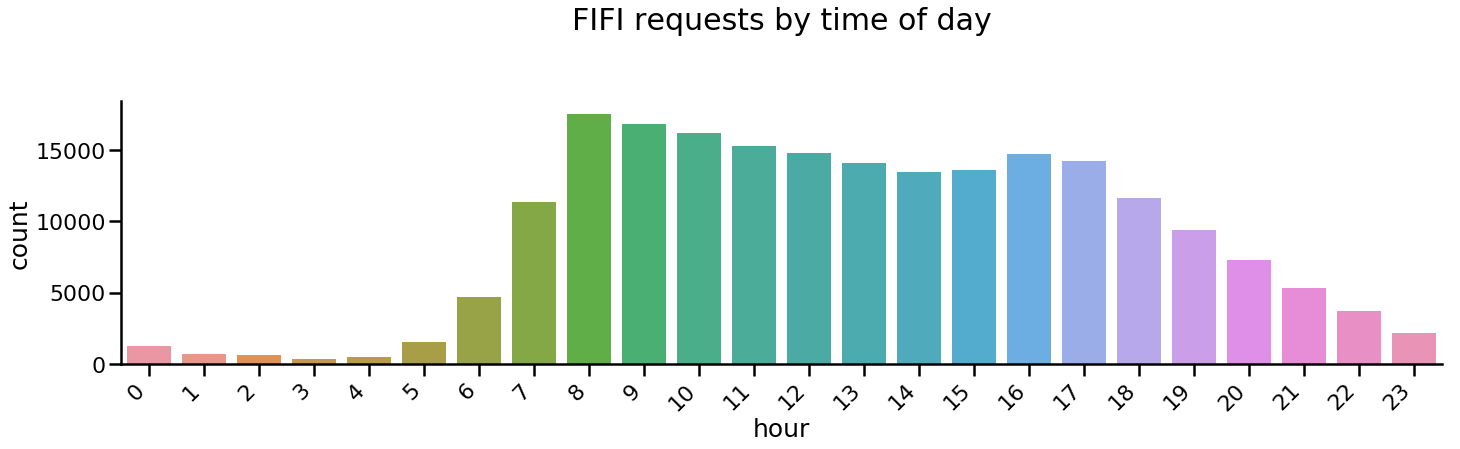

In [13]:
#viz FIFI requests across time
g = sns.catplot(x='hour', data=data_complete, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by time of day', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [14]:
data_complete['Location'].value_counts()

1906 9TH AVE, SEATTLE, WA 98101                        278
2480 BIRCH AVE N, SEATTLE, WA 98109                    271
8456 7TH AVE SW, SEATTLE, WA 98106                     194
4825 S MYRTLE ST, SEATTLE, WA 98118                    172
311 DENNY WAY, SEATTLE, WA 98109                       165
4455 SHILSHOLE AVE NW, SEATTLE, WA 98107               159
4200 36TH AVE S, SEATTLE, WA 98118                     151
5701 22ND AVE NW, SEATTLE, WA 98107                    148
4993 7TH AVE NE, SEATTLE, WA 98105                     146
4700 9TH AVE NW, SEATTLE, WA 98107                     143
1204 N 50TH ST, SEATTLE, WA 98103                      139
1498 RAINIER AVE S, SEATTLE, WA 98144                  139
3600 3RD AVE NW, SEATTLE, WA 98107                     135
5980 SEAVIEW AVE NW, SEATTLE, WA 98107                 128
2601 W COMMODORE WAY, SEATTLE, WA 98199                128
4301 8TH AVE NW, SEATTLE, WA 98107                     127
1501 NW 46TH ST, SEATTLE, WA 98107                     1

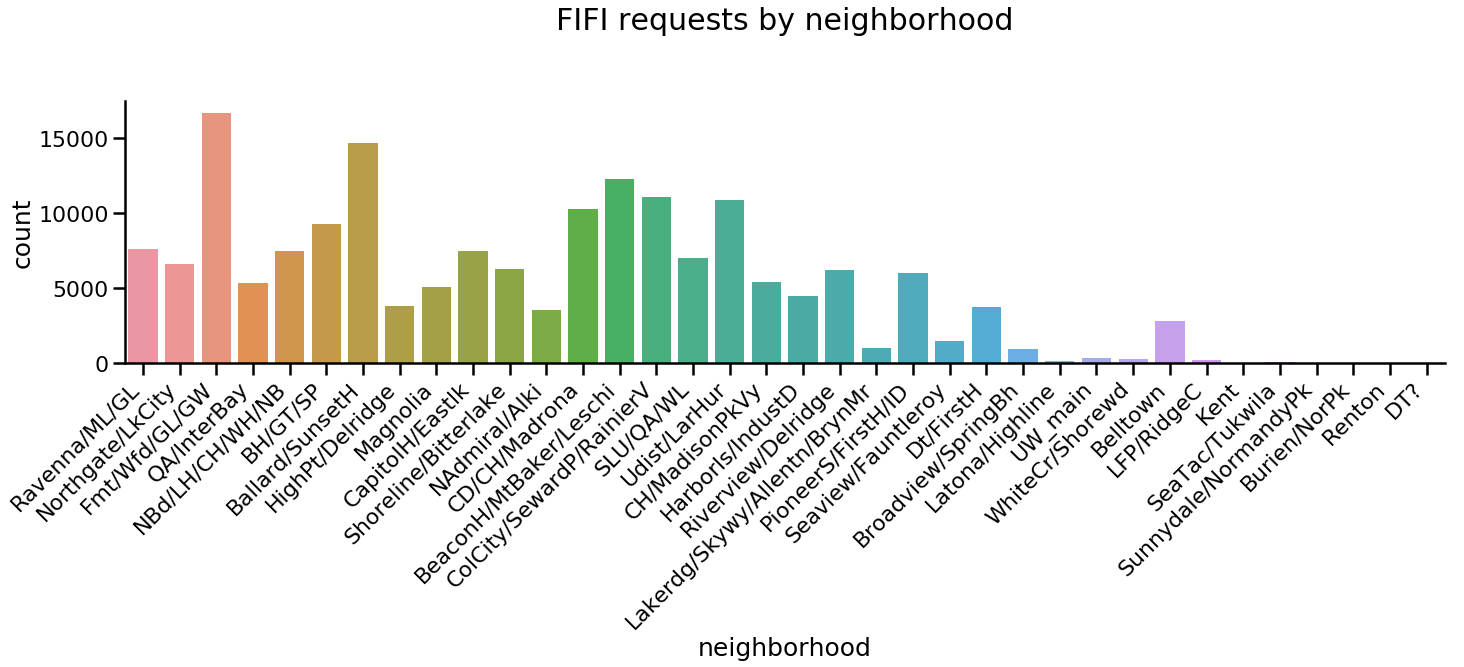

In [15]:
#how do counts change across neighborhood?
g = sns.catplot(x='neighborhood', data=data_complete[data_complete['zip'] != 'WA'], kind='count', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)

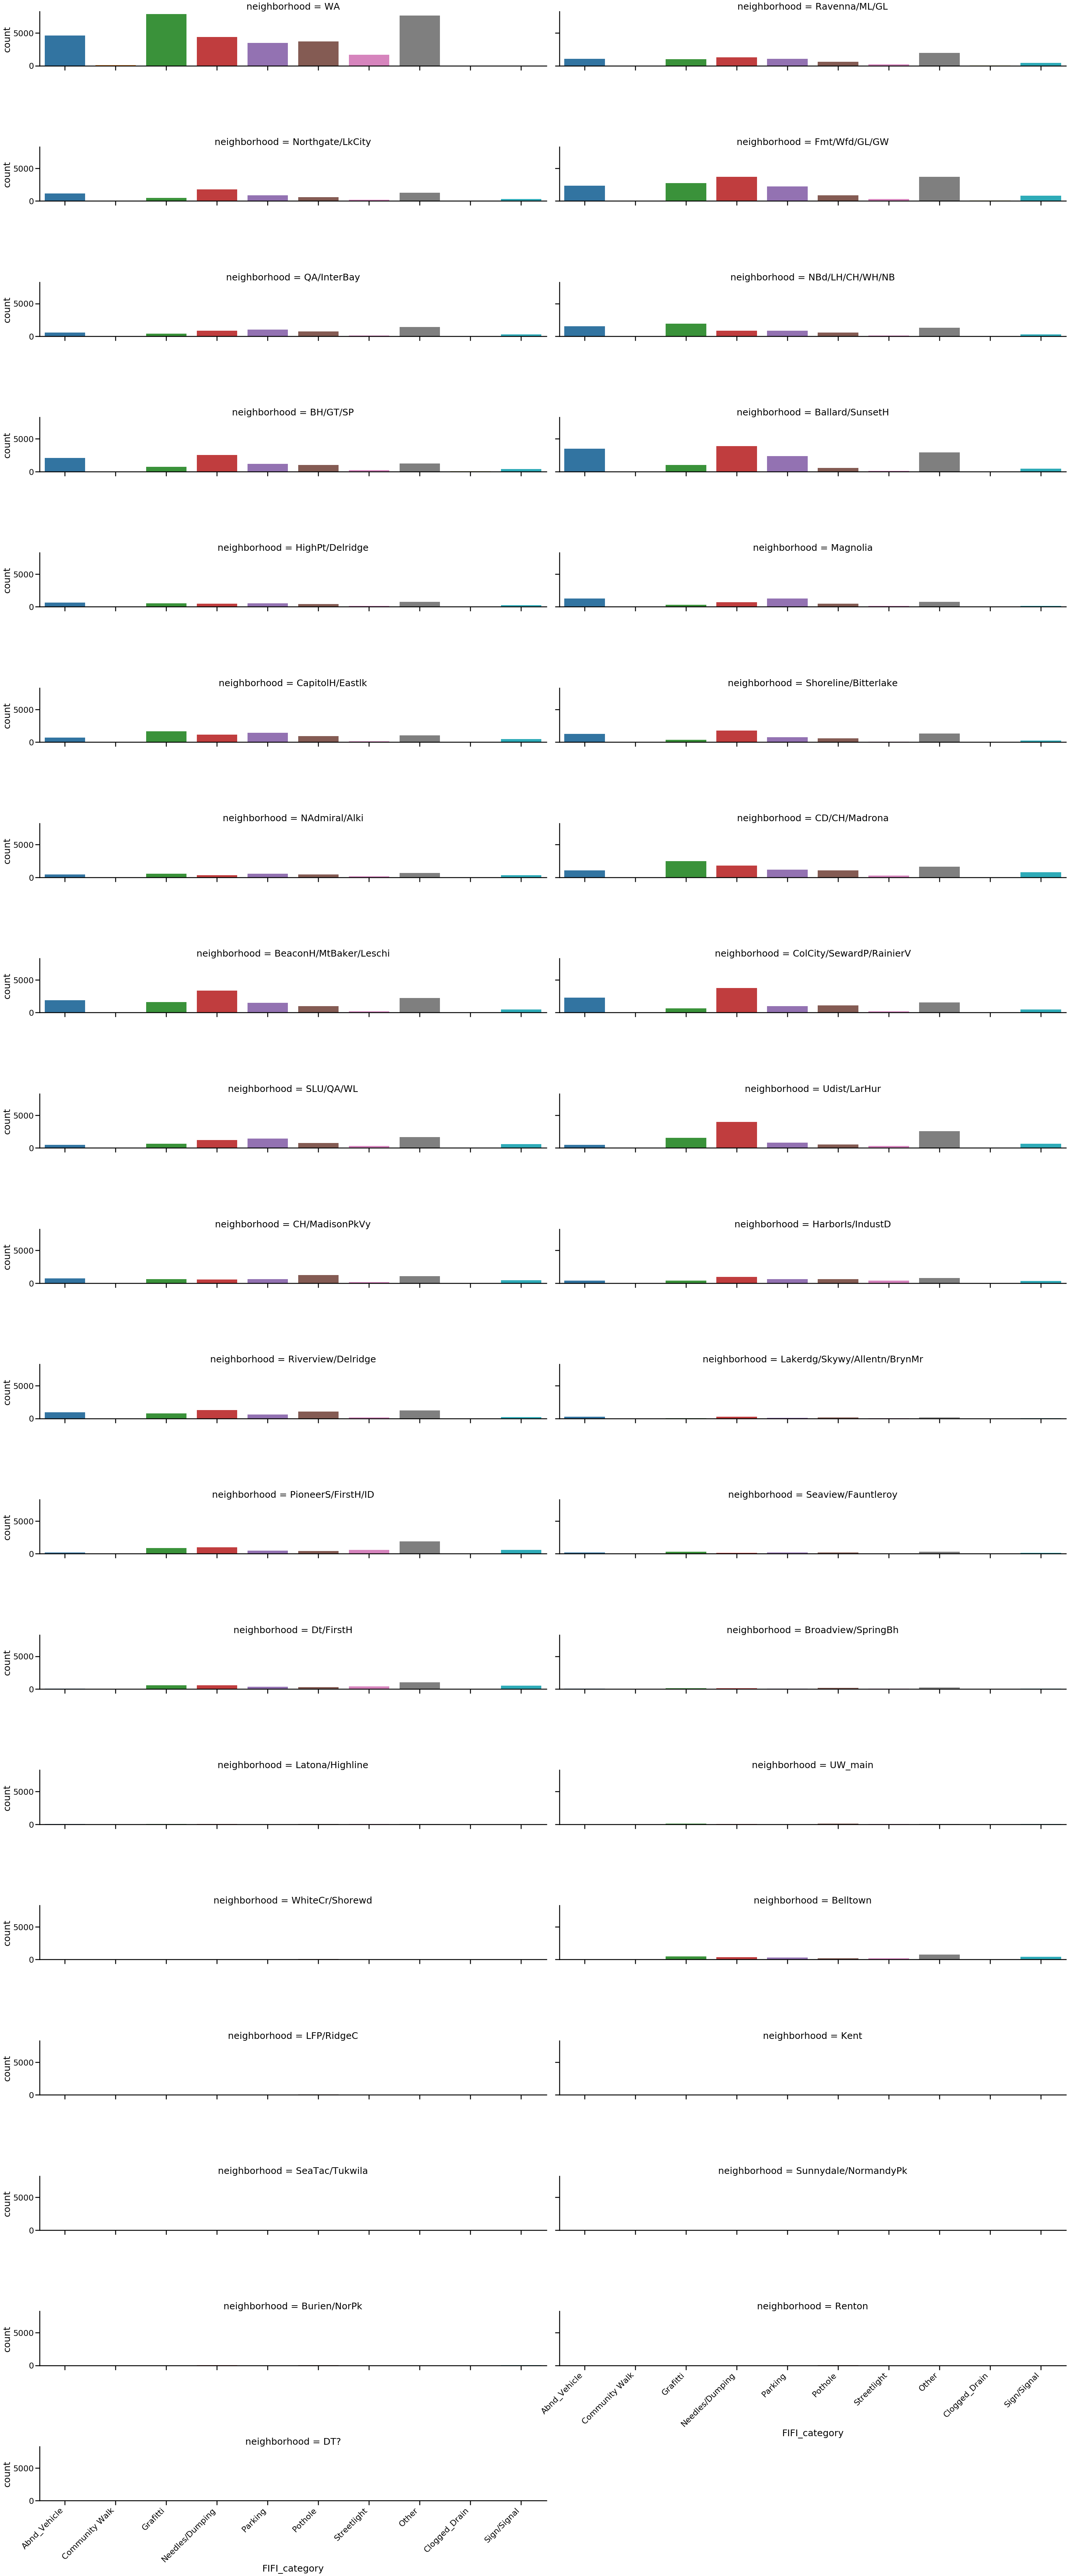

In [98]:
#how do counts change across neighborhood and FIFI_category?
g = sns.catplot(x='FIFI_category', data=data_complete, col='neighborhood', col_wrap=2, kind='count', ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
#plt.title('FIFI requests by time of day', y=1.25)
plt.subplots_adjust(hspace = 1.5)

In [102]:
data_2018['neighborhood'].value_counts()

Fmt/Wfd/GL/GW                   7803
Ballard/SunsetH                 6850
Udist/LarHur                    5343
BeaconH/MtBaker/Leschi          5081
BH/GT/SP                        4684
ColCity/SewardP/RainierV        4030
CD/CH/Madrona                   3882
Ravenna/ML/GL                   3479
SLU/QA/WL                       3291
Shoreline/Bitterlake            3132
Northgate/LkCity                3009
PioneerS/FirstH/ID              3008
CapitolH/Eastlk                 2761
NBd/LH/CH/WH/NB                 2446
Riverview/Delridge              2428
QA/InterBay                     2192
CH/MadisonPkVy                  2043
HarborIs/IndustD                2035
Magnolia                        2032
HighPt/Delridge                 1765
Dt/FirstH                       1710
NAdmiral/Alki                   1492
Belltown                        1204
Seaview/Fauntleroy               514
Lakerdg/Skywy/Allentn/BrynMr     459
Broadview/SpringBh               434
WhiteCr/Shorewd                   99
U

### closer look at 2018

In [107]:
#read in excel file containing meta data on zip codes in seattle for the year 2018
data_demogs = pd.read_excel(path_demogs)
data_demogs = pd.DataFrame(data = data_demogs)
data_demogs['zip'] = data_demogs['zip'].astype(str)

#select just data from 2018 and zips that have greater than 1000 entries
print(data.shape)
data_2018 = data[data['year'] == 2018]
print(data_2018.shape)
zip_counts = data_2018['zip'].value_counts()
zip_counts_1000 = zip_counts[zip_counts > 999].index.values
data_2018 = data_2018[data_2018['zip'].isin(zip_counts_1000)]
print(data_2018.shape)

#combine FIFI data with corresponding zip code meta data, use only 2018
counts_2018 = data_2018.groupby('zip')['zip'].count().reset_index(name='count')
data_2018_counts = pd.merge(counts_2018, data_demogs, on='zip', sort=False)
print(data_2018_counts.shape)
data_2018_counts.head(1)

#combine FIFI data with corresponding zip code meta data, use only 2018 and 'other'
counts_2018_other = data_2018[data_2018['FIFI_category'] == 'Other'].groupby('zip')['zip'].count().reset_index(name='count')
data_2018_other_counts = pd.merge(counts_2018_other, data_demogs, on='zip', sort=False)
print(data_2018_other_counts.shape)

#combine FIFI data with corresponding zip code meta data, use only 2018 and 'Needles/Dumping'
counts_2018_nd = data_2018[data_2018['FIFI_category'] == 'Needles/Dumping'].groupby('zip')['zip'].count().reset_index(name='count')
data_2018_nd_counts = pd.merge(counts_2018_nd, data_demogs, on='zip', sort=False)
print(data_2018_nd_counts.shape)

(248815, 67)
(77409, 67)
(75700, 67)
(23, 32)
(23, 32)
(23, 32)


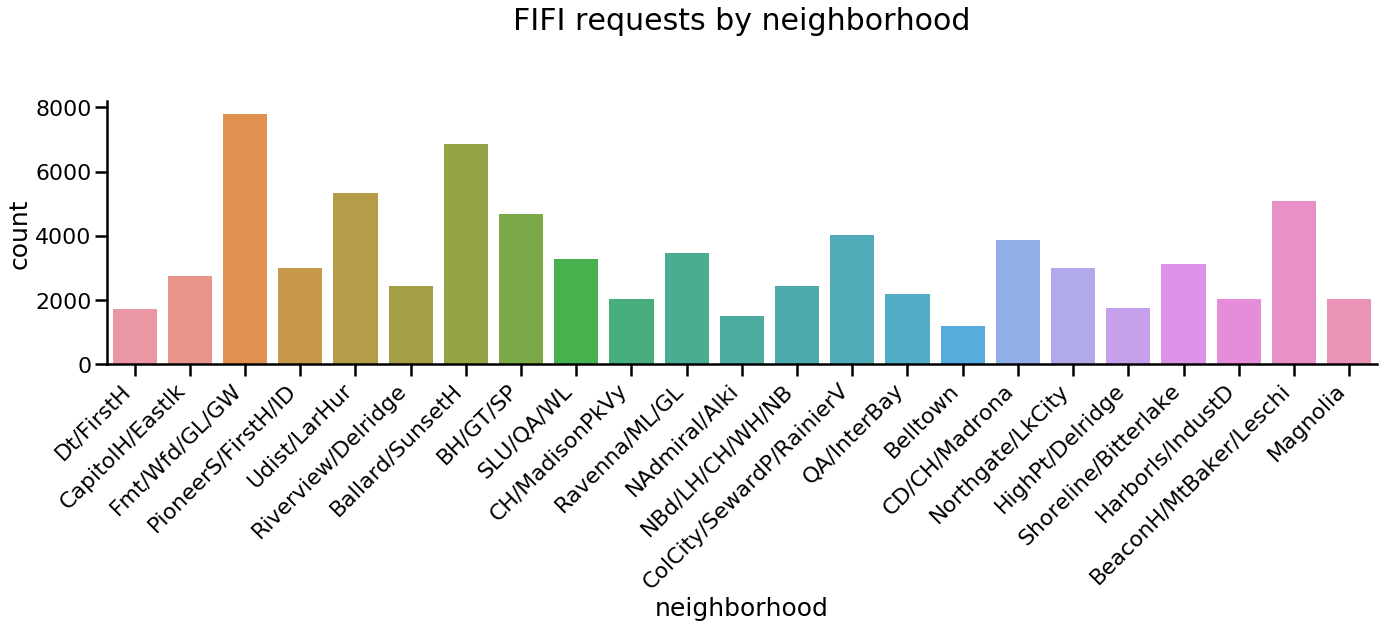

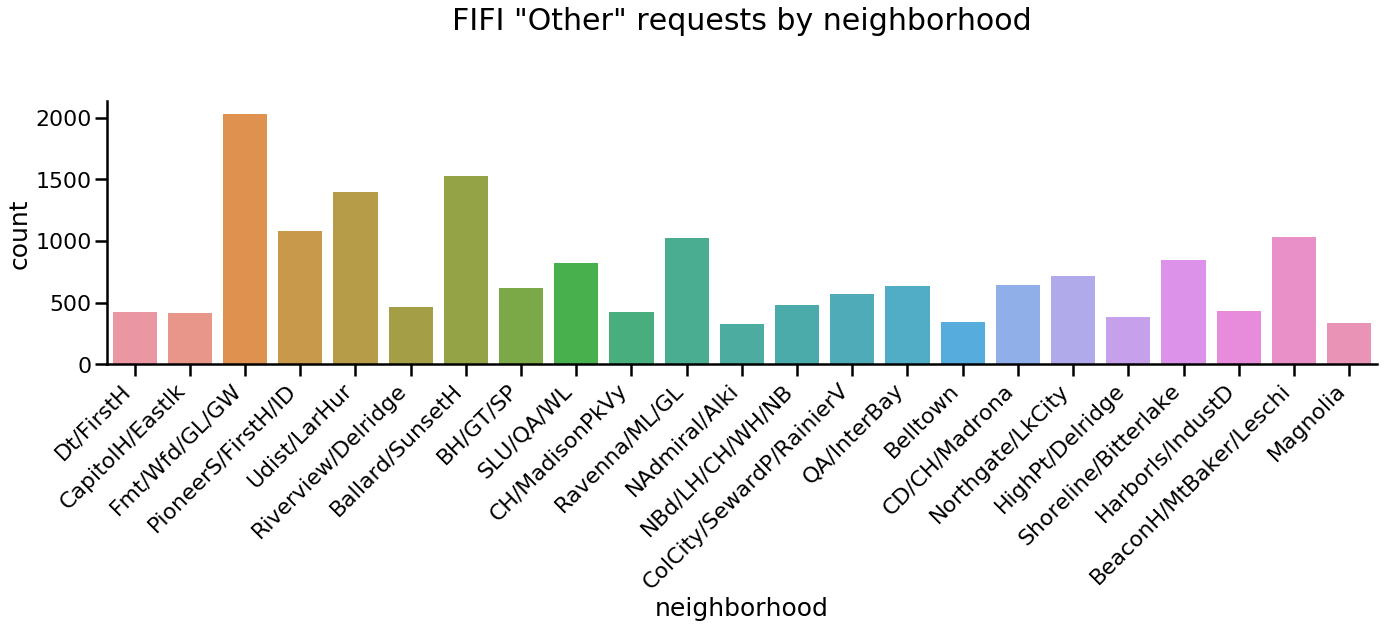

In [108]:
#how do counts change across neighborhood?
g = sns.catplot(x='neighborhood', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='neighborhood', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI "Other" requests by neighborhood', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

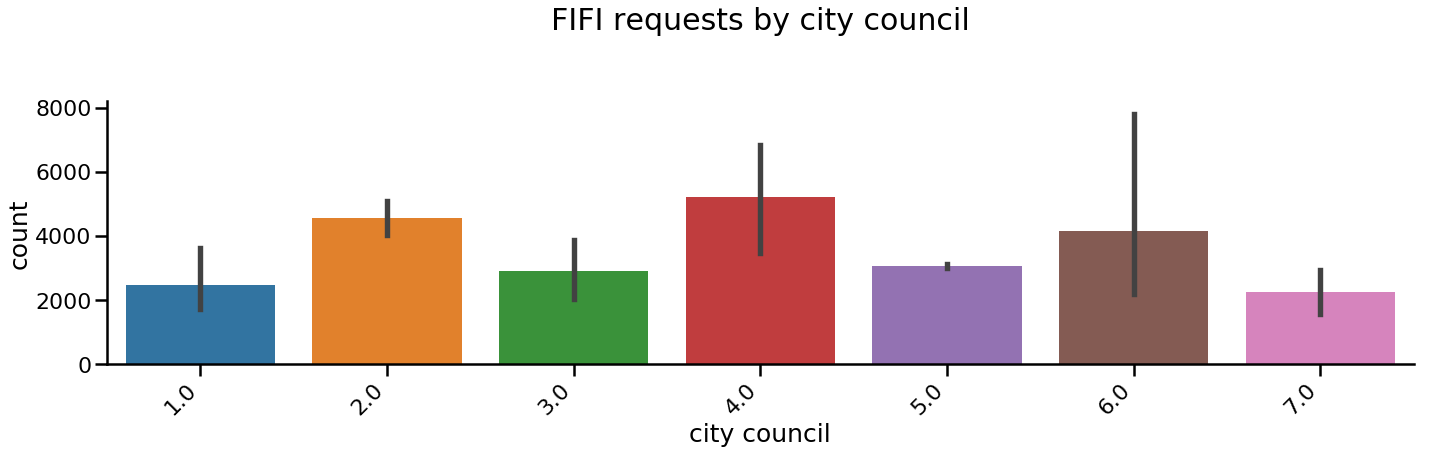

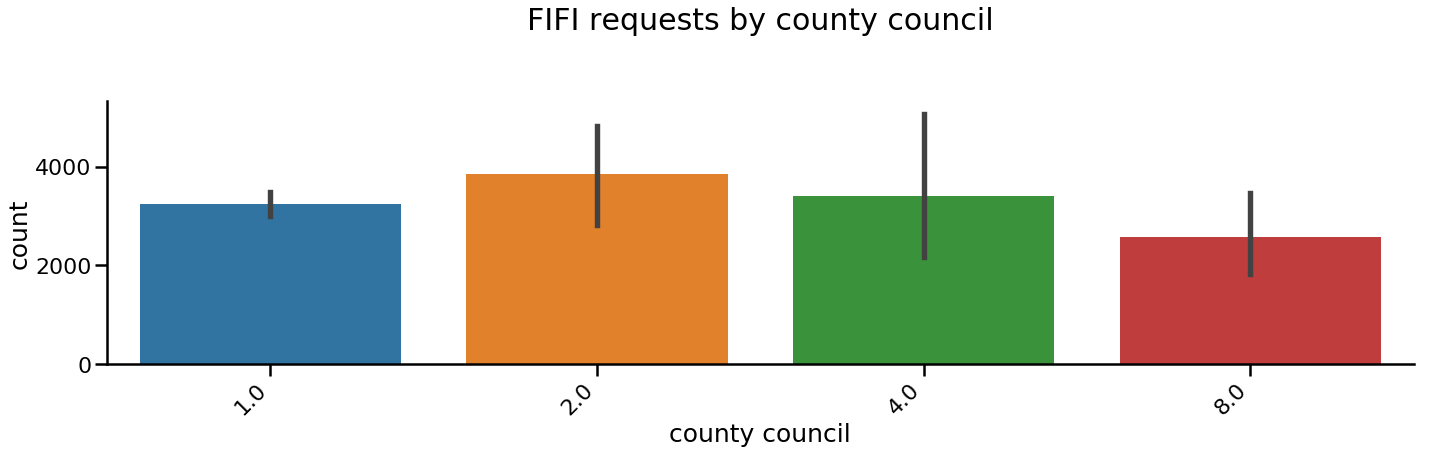

In [109]:
#how do counts change by city and county council districts?
g = sns.catplot(x='city council', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

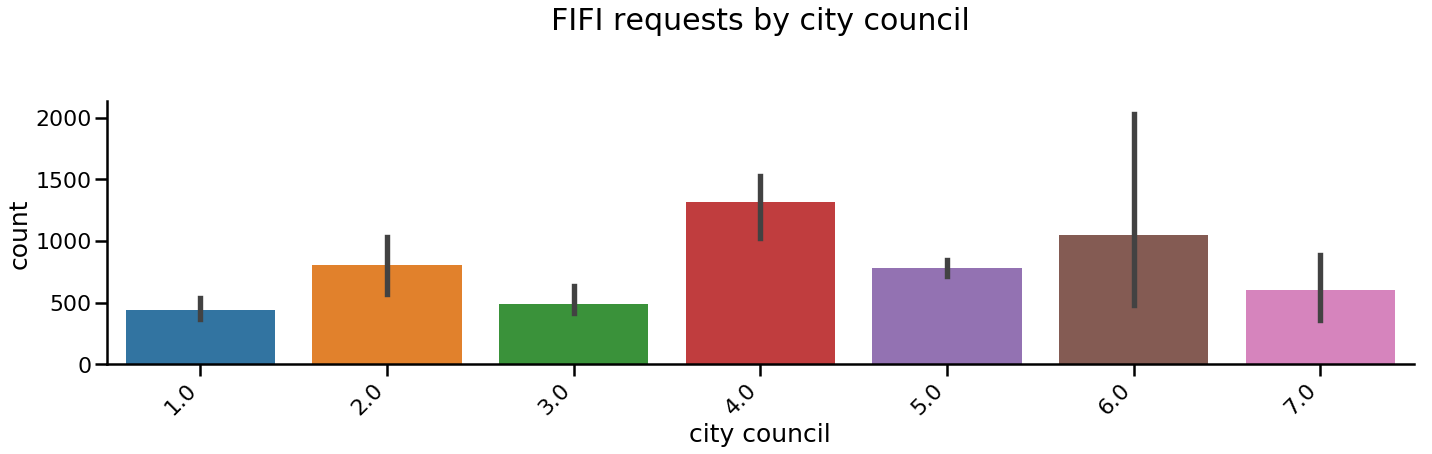

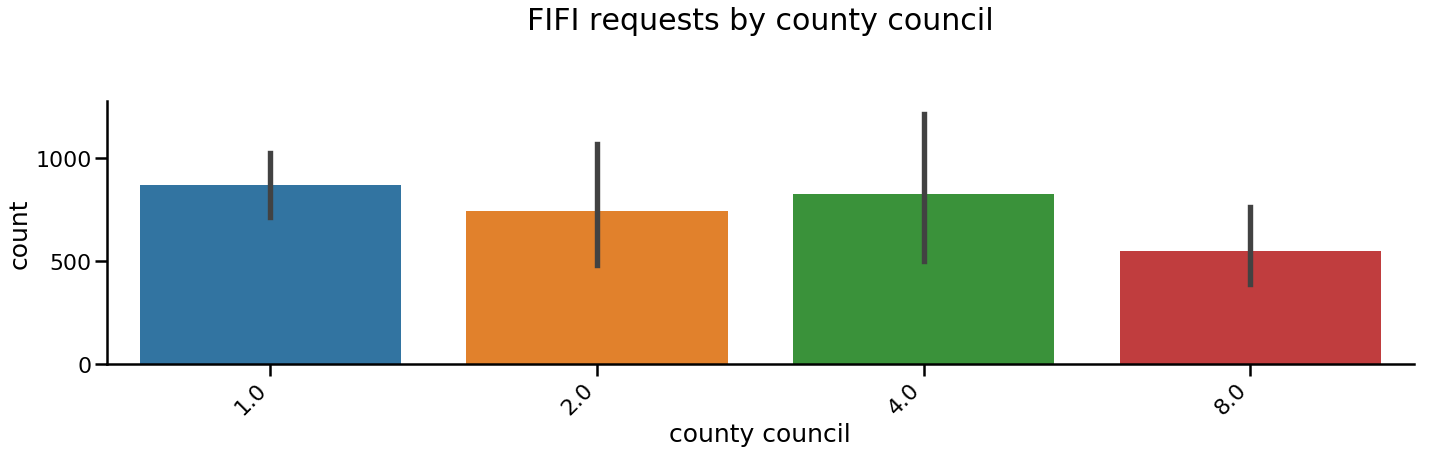

In [110]:
#how do counts change by city and county council districts if only looking at the other category?
g = sns.catplot(x='city council', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_other_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

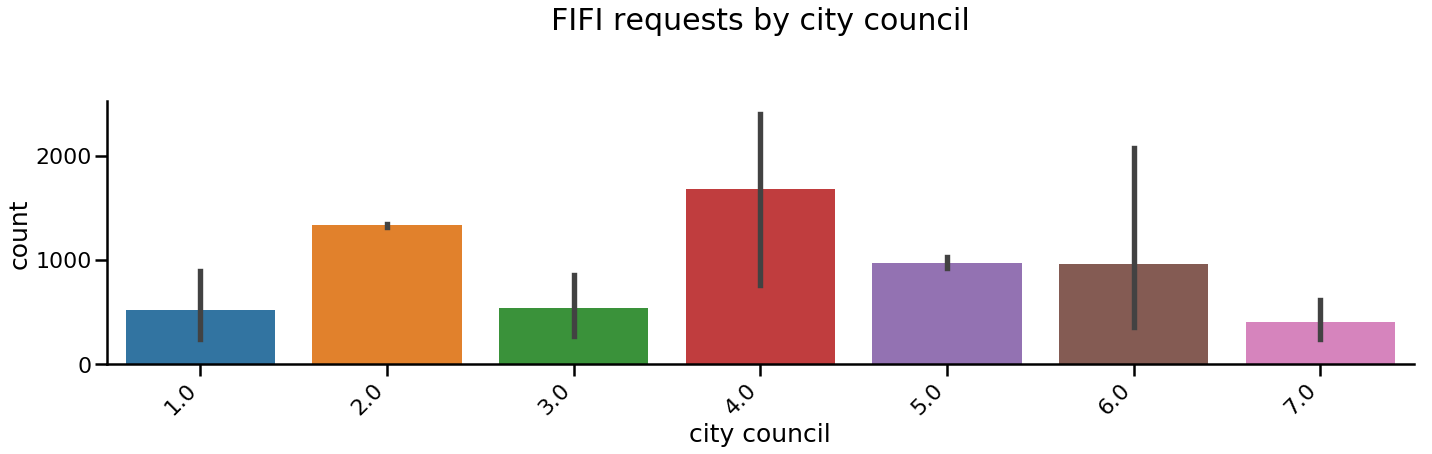

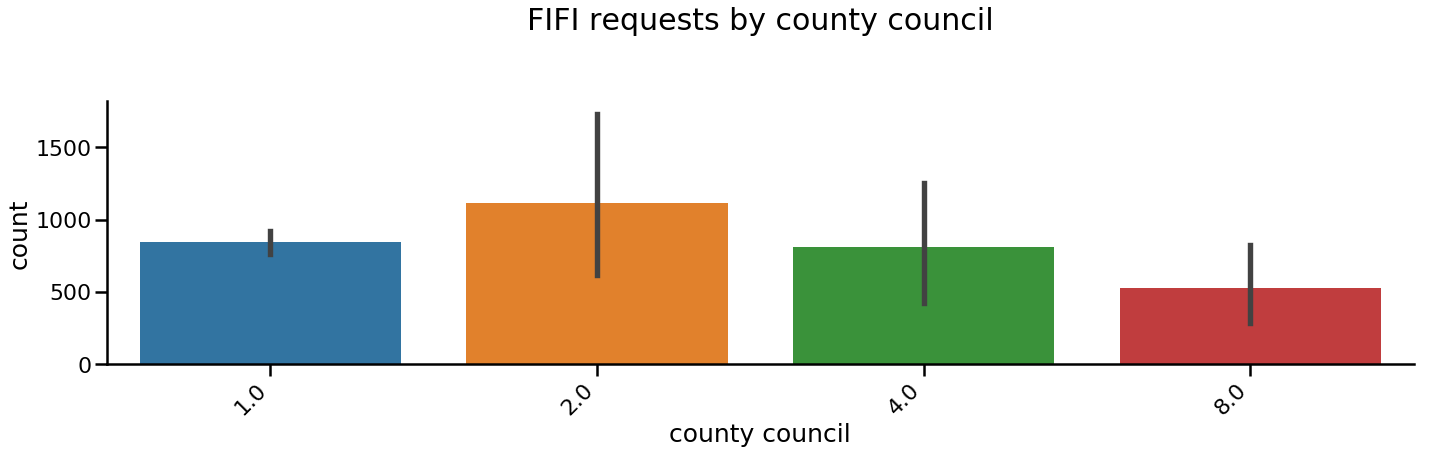

In [111]:
#how do counts change by city and county council districts if only looking at the needles/dumping category?
g = sns.catplot(x='city council', data=data_2018_nd_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by city council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

g = sns.catplot(x='county council', data=data_2018_nd_counts, y='count', kind='bar', height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.title('FIFI requests by county council', y=1.25)
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [151]:
data_2018_counts_city = data_2018_counts[~data_2018_counts['city council'].isna()]
data_2018_counts_staying = data_2018_counts[~data_2018_counts['SittingInformal'].isna()]

In [152]:
corr_variables = ['overdose', 'pop', 'pop_dens',
       'housing_units', 'med_home', 'land_area', 'occupied_units',
       'occupied_ratio', 'med_income', 'med_age', 'male_%', 'white_%',
       'fam_%', 'nokid_%', 'mortgage_%', 'fulltime_%', 'unemploy',
       'drive_%', 'publictrans_%', 'other_%', 'wrk_travel']

for variable in corr_variables:
    pearsonr, p_value = sp.stats.pearsonr(data_2018_counts_city['count'], data_2018_counts_city[variable])
    if p_value < 0.05:
        print('The ', variable, ' is significantly correlated!')
        print(pearsonr)
        print(p_value)
        print('\n')

The  pop  is significantly correlated!
0.5221753323937222
0.010590579163389296


The  housing_units  is significantly correlated!
0.48840476988051346
0.01804951529231303


The  occupied_units  is significantly correlated!
0.4973233475817827
0.015757528232616193


The  med_age  is significantly correlated!
-0.4424540571959636
0.03450463098515219




In [153]:
corr_variables = ['SittingInformal', 'Lying',
       'DisruptiveActivity_Aggressive', 'DisruptiveActivity_Intoxicated',
       'LivingActivities', 'Soliciting', 'overdose', 'pop', 'pop_dens',
       'housing_units', 'med_home', 'land_area', 'occupied_units',
       'occupied_ratio', 'med_income', 'med_age', 'male_%', 'white_%',
       'fam_%', 'nokid_%', 'mortgage_%', 'fulltime_%', 'unemploy',
       'drive_%', 'publictrans_%', 'other_%', 'wrk_travel']

for variable in corr_variables:
    pearsonr, p_value = sp.stats.pearsonr(data_2018_counts_staying['count'], data_2018_counts_staying[variable])
    if p_value < 0.05:
        print('The ', variable, ' is significantly correlated!')
        print(p_value)
        print('\n')

The  pop  is significantly correlated!
0.02155674155841587


The  housing_units  is significantly correlated!
0.03589358442823836


The  occupied_units  is significantly correlated!
0.03144194544025465




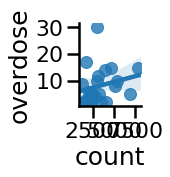

In [116]:
sns.pairplot(data_2018_counts, x_vars='count', y_vars='overdose', kind='reg')

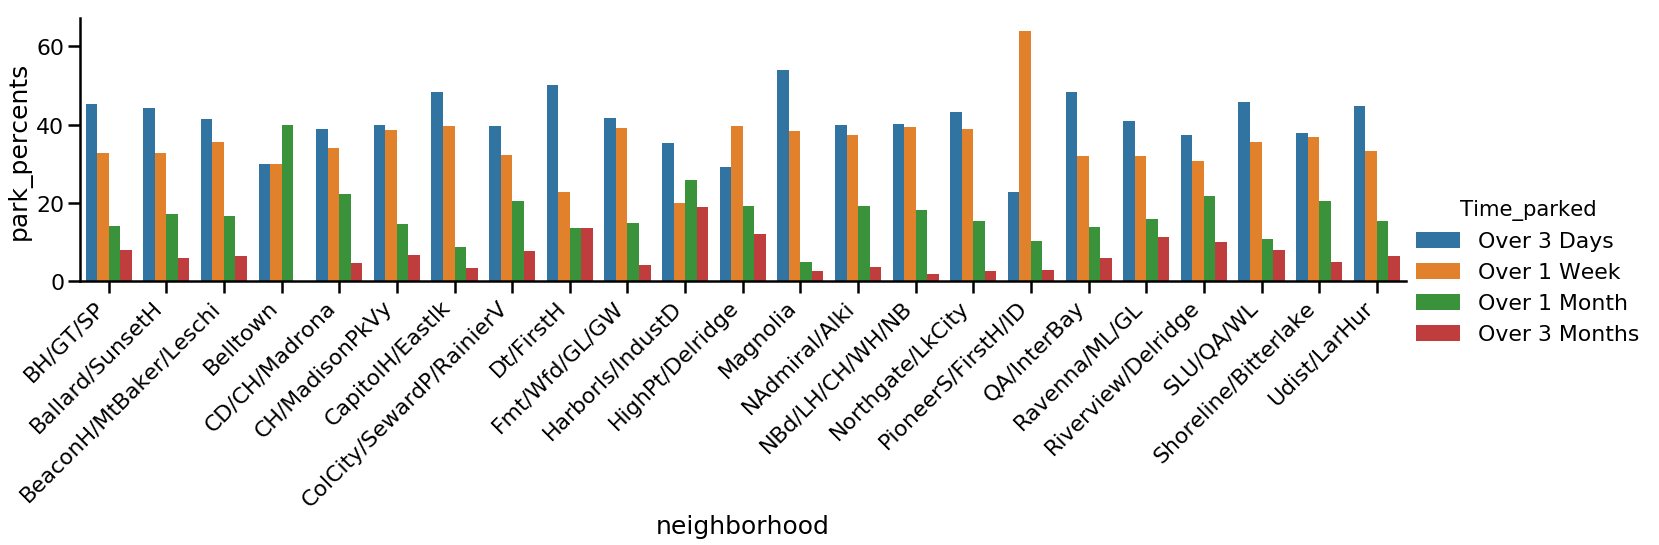

In [117]:
#viz the percentage of FIFI request for each time segment within the 'Abnd_Vehicle' category by neighborhood
data_vehicle = data_2018[data_2018['FIFI_category'] == 'Abnd_Vehicle']

cars_zip_count = data_vehicle.groupby('neighborhood')['Time_parked'].count().reset_index(name='Total_count')
cars_zip_park_count = data_vehicle.groupby('neighborhood')['Time_parked'].value_counts().reset_index(name='Time_count')

for neighborhood in data_vehicle['neighborhood'].unique():
    percents = cars_zip_park_count[cars_zip_park_count['neighborhood'] == neighborhood]['Time_count'].values / \
    cars_zip_count[cars_zip_count['neighborhood'] == neighborhood]['Total_count'].values * 100
    
    cars_zip_park_count.loc[cars_zip_park_count['neighborhood'] == neighborhood, 'park_percents'] = percents
    
    
g = sns.catplot(x='neighborhood', data=cars_zip_park_count, y='park_percents', kind='bar', hue='Time_parked', \
               ci=68, height=5, aspect=4, hue_order=['Over 3 Days', 'Over 1 Week', 'Over 1 Month', 'Over 3 Months'])
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

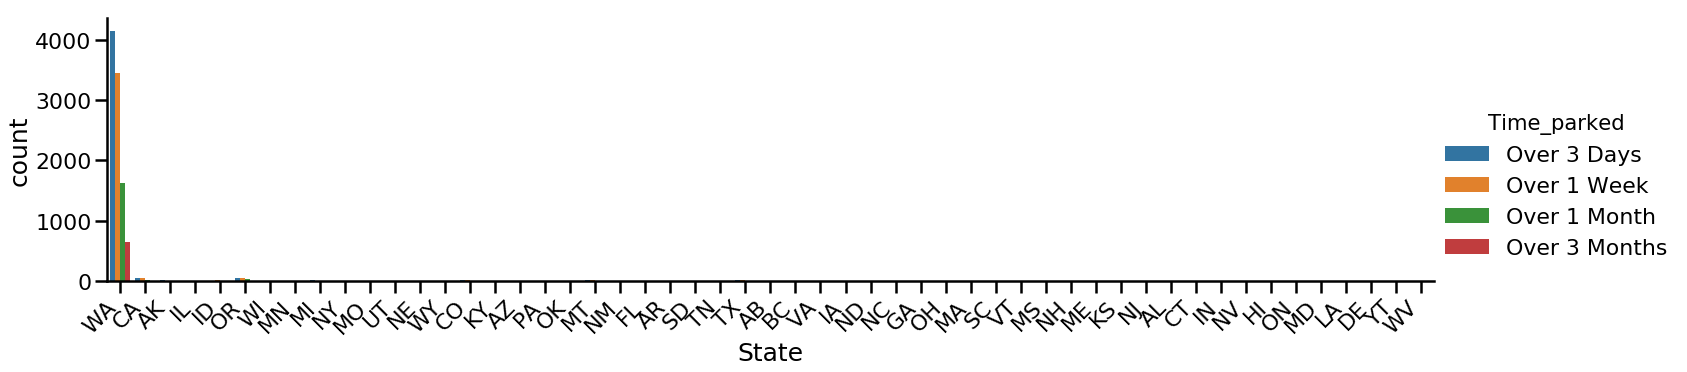

In [118]:
g = sns.catplot(x='State', data=data_vehicle, kind='count', hue='Time_parked', \
               ci=68, height=5, aspect=4, hue_order=['Over 3 Days', 'Over 1 Week', 'Over 1 Month', 'Over 3 Months'])
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

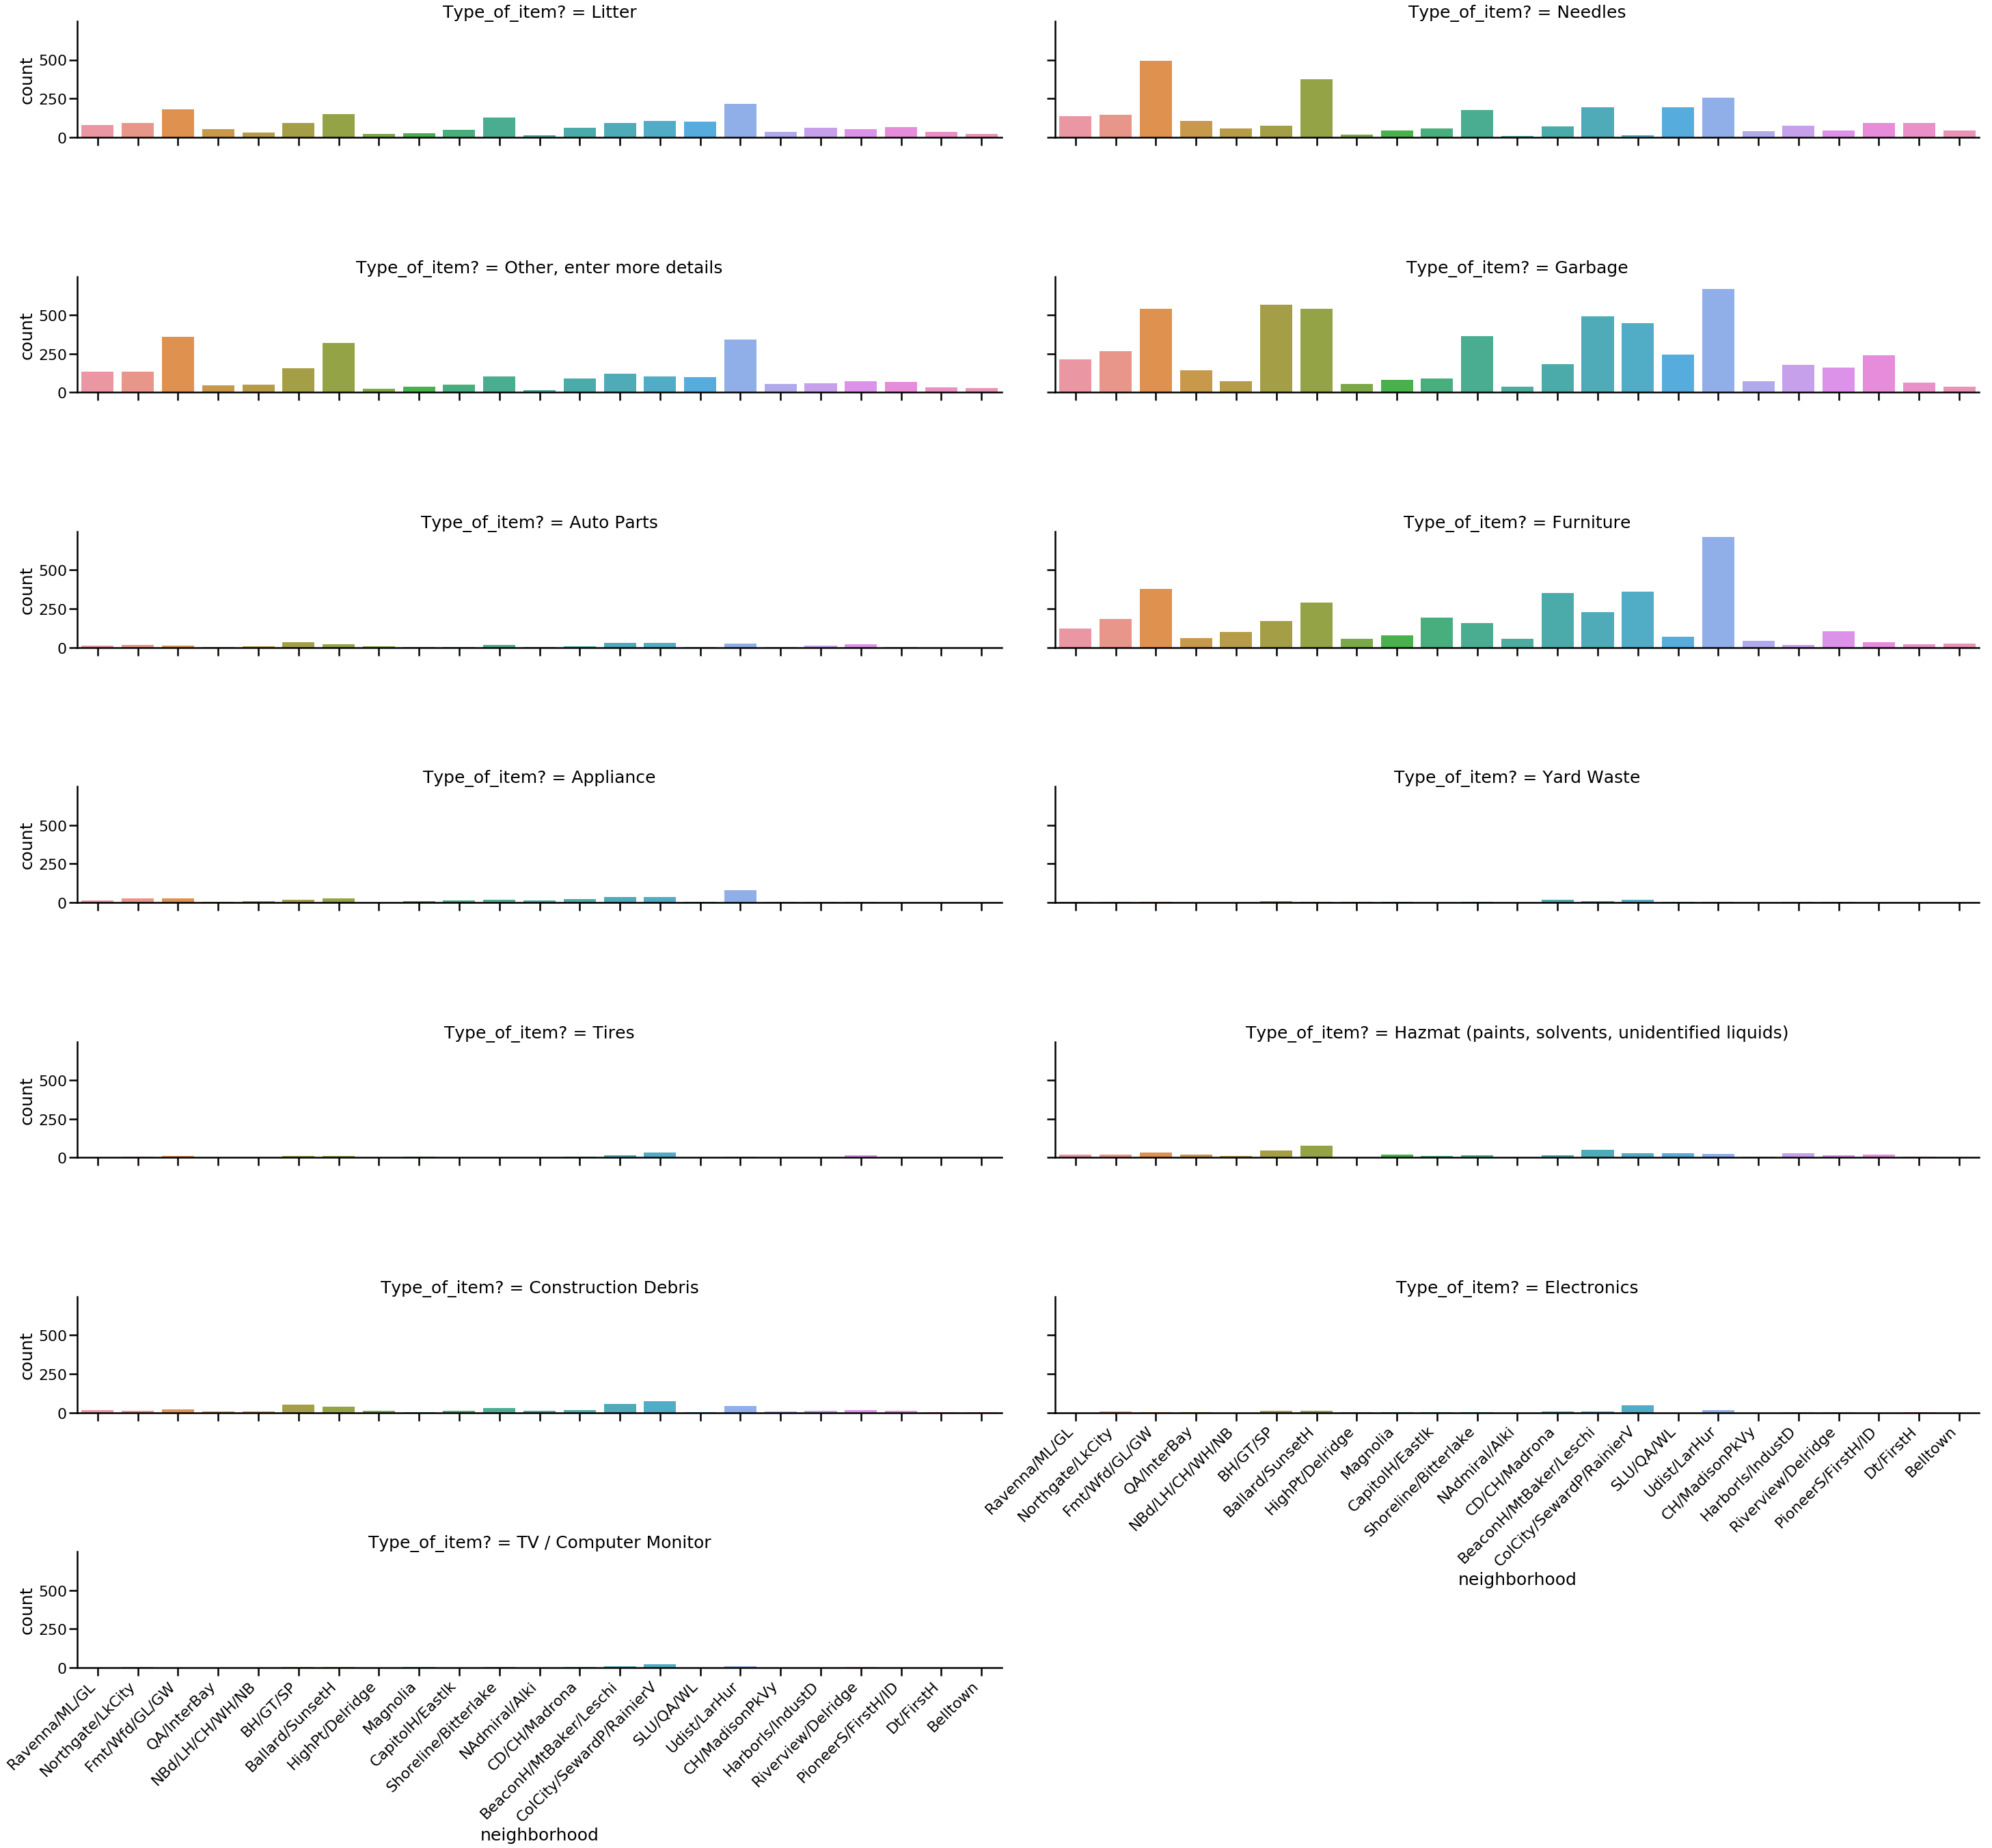

In [144]:
data_needles = data_2018[data_2018['FIFI_category'] == 'Needles/Dumping']

g = sns.catplot(x='neighborhood', data=data_needles, kind='count', col='Type_of_item?', col_wrap=2, \
               ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)

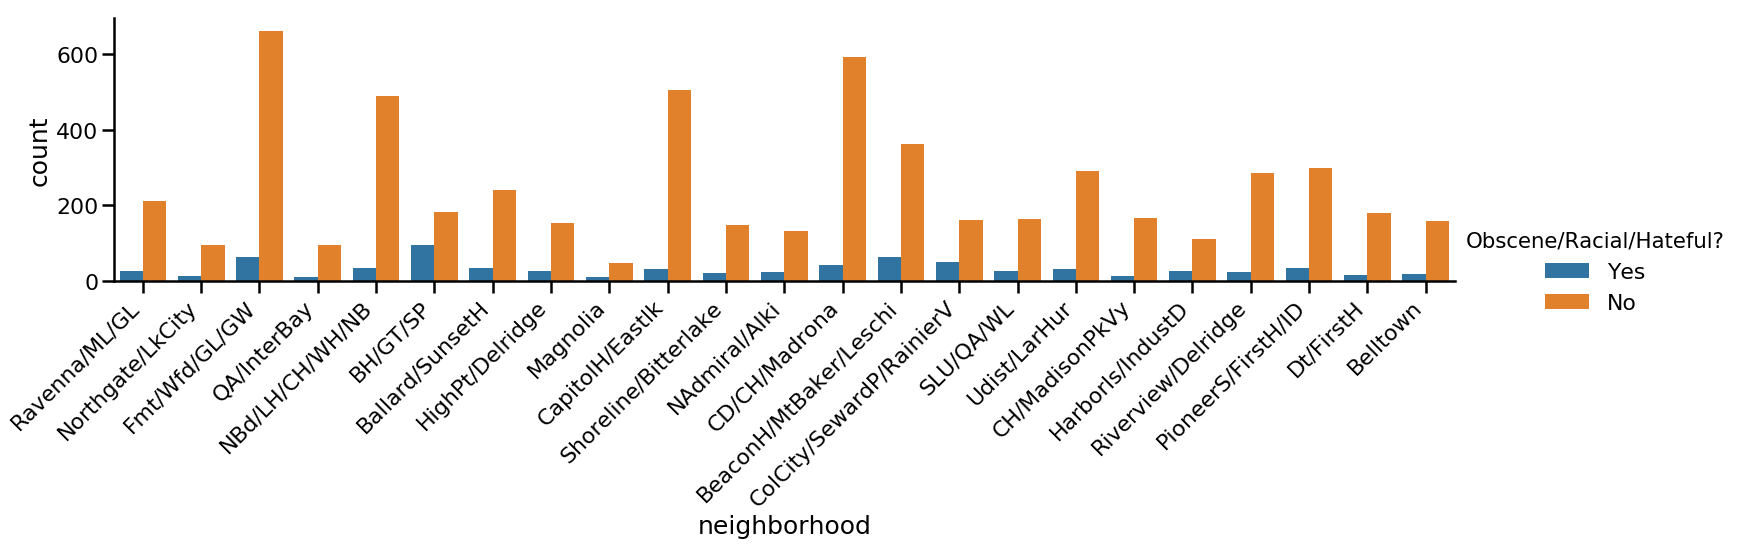

In [142]:
data_grafitti = data_2018[data_2018['FIFI_category'] == 'Grafitti']

g = sns.catplot(x='neighborhood', data=data_grafitti, kind='count', hue='Obscene/Racial/Hateful?', \
               ci=68, height=5, aspect=4)
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)